# 1  Neural Network classification with pytroch

classification is a problem of predicting weather something is one thing or another ( there can be multiple things as the options )

## Make the classification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
# make 1000 samples
n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state= 42) 

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 sample of X :\n {X[:5]}")
print(f"First 5 sample of y :\n {y[:5]}")

First 5 sample of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y :
 [1 1 1 1 0]


In [5]:

import pandas as pd

In [6]:
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                       "label": y})

In [7]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [34]:
#visualize the data we had
import matplotlib.pyplot as plt

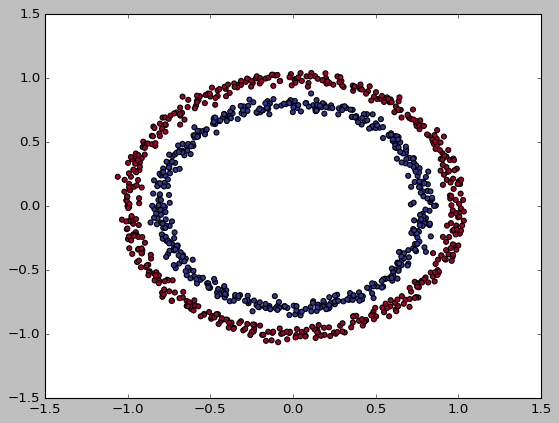

In [35]:
plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu)

Note: The data we are working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practise the fundamentals.

## 1.1 Check the input shapes and the output shape. 

In [10]:
## for the work with the pytorch, we need to trasfer the data type into the tensor.
X.shape, y.shape

((1000, 2), (1000,))

## 1.2 Turn data into tensors and create train and test splits

In [11]:
import torch
torch.__version__ ## version > 1.10

'2.0.1+cu117'

In [12]:
type(X) ## since this is the numpy type array this should be transger into the tensor data type for pytorch to use.


numpy.ndarray

In [13]:
# Turn data into tensors
y_tensor = torch.from_numpy(y).type(torch.float)
X_tensor = torch.from_numpy(X).type(torch.float)

X_tensor[:5], y_tensor[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X_tensor)

torch.Tensor

# split data into training and test sets 

In [15]:
RANDOM_SEED = 42

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, 
                                                    y_tensor, 
                                                    test_size=0.2, # 0.2 means 20% test set, 80% train set.
                                                    random_state = RANDOM_SEED )

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test) ## so we could see that the data set have been split into 2:8

(800, 200, 800, 200)

## Build a Model

Let's build a model to classify our blue and red dots.


To do so, we want to: 
1. set up device agonistic code so our code will run on an accelerator (GPU) if there is one
2.  Construct a model (By subClassing `nn.Module`)
3.  Define loss function and optimizer
4.  create a train and test loop

In [18]:
# import pytorch and nn 
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'

device

'cuda'

## Go for the Model!!!!!
1. subclass `nn.Module` (almost all models in pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` Layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`
5. 

In [19]:
# 1. construct a model that subclass nn.Moudle
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features.
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # the out put layer out put the final res as 1 output.

    #3. define a forward() method that outlines the forward pass 
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
#let's replicate the model a 
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=7),
    nn.ReLU(),
    nn.Linear(in_features=7, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0644,  0.1485],
                      [-0.3712,  0.4202],
                      [-0.5955,  0.5684],
                      [-0.3464,  0.5814],
                      [-0.5950,  0.2640],
                      [-0.6949, -0.6525],
                      [-0.3137, -0.6190]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3961,  0.6618, -0.4996, -0.6541, -0.3139, -0.2245, -0.5257],
                     device='cuda:0')),
             ('2.weight',
              tensor([[-6.4069e-02, -2.7565e-01, -2.3306e-02, -2.2518e-01,  2.2095e-04,
                       -1.8042e-01, -2.8865e-01]], device='cuda:0')),
             ('2.bias', tensor([-0.0313], device='cuda:0'))])

In [23]:
# make some predictions 
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 1- labels: \n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.3641],
        [-0.3588],
        [-0.3534],
        [-0.3949],
        [-0.1064],
        [-0.1055],
        [-0.2240],
        [-0.1645],
        [-0.3638],
        [-0.3564]], device='cuda:0', grad_fn=<SliceBackward0>)

First 1- labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 set up loss function and optimizer
Which loss function or optimizer should you use?

Again... this is problem specific. 

For example for regression you might want MAE pr MSE (Mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy(cross entropy)

As a reminder, the loss function measures how *wrong* your models predictions are. 

and for optimizers, two of the most common and useful are SGD and Adam, however pytorch has many built-in options.

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is.
* for different optimizers see `torch.optim`



In [24]:
# SET UP the loss function
## loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss()  ## sigmoid activation function built-in
## BCEWithLogitsLoss is smth like
## nn.Sequential(
##   nn.Sigmoid(),
##   nn.BCELoss()
## )
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)  ## SGD: stochastic gradient descent


In [25]:
# Calculate accuracy at the same time     [ Accuracy = (True Positive) / (True Positive + True Negative) * 100 ]
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# 3. Train the model
- 1. Forward pass 
- 2. Calculate the loss 
- 3. Zero gradients
- 4. Perform backpropagation on the loss
- 5. step the optimizer (gradient descent) 

## 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our Model outputs are going to be raw logits. 

We can convert these logits into prediction probabilities by passing them to some kind of activation function(sigmoid for binary classification and softmax for multiclass classification)

then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax()

In [26]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3641],
        [-0.3588],
        [-0.3534],
        [-0.3949],
        [-0.1064]], device='cuda:0', grad_fn=<SliceBackward0>)

In [27]:
## for our prediction probaility valuesm, we need to perform a range-style rounding on them: 
# * `y_pred_probs >= 0.5, y=1 ( class 1 )`
# * `y_pred_probs < 0.5, y=0 ( class 0 )`

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4100],
        [0.4112],
        [0.4126],
        [0.4025],
        [0.4734]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [28]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [29]:
# in some what y preds we will call it y_pred_labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
## check for the quility 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# squeeze is use for get rid of the extra dimension
y_pred_labels.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

#### 3.2 Building a training  and testing loop

In [30]:
torch.manual_seed(42)
## torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 5000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input --------- so we dont have to wrap the logits with the sigmoid func
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    # 3. optimizer zero grad
    optimizer.zero_grad()
    # 4. loss back ward 
    loss.backward()

    #5. Optimizer step(Gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass 
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/ acc
        test_loss = loss_fn(test_logits, y_test) 
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    #Print out what's happen
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.69920, Acc: 50.00% | Test Loss: 0.69997, Test acc: 50.00%
Epoch: 100 | Loss: 0.68320, Acc: 55.62% | Test Loss: 0.68786, Test acc: 53.50%
Epoch: 200 | Loss: 0.67772, Acc: 60.50% | Test Loss: 0.68449, Test acc: 57.00%
Epoch: 300 | Loss: 0.67283, Acc: 60.00% | Test Loss: 0.68061, Test acc: 57.00%
Epoch: 400 | Loss: 0.66795, Acc: 58.25% | Test Loss: 0.67559, Test acc: 55.50%
Epoch: 500 | Loss: 0.66256, Acc: 59.13% | Test Loss: 0.66982, Test acc: 57.50%
Epoch: 600 | Loss: 0.65580, Acc: 61.38% | Test Loss: 0.66288, Test acc: 60.00%
Epoch: 700 | Loss: 0.64744, Acc: 64.38% | Test Loss: 0.65556, Test acc: 66.00%
Epoch: 800 | Loss: 0.63718, Acc: 66.25% | Test Loss: 0.64645, Test acc: 68.00%
Epoch: 900 | Loss: 0.62514, Acc: 69.00% | Test Loss: 0.63551, Test acc: 70.50%
Epoch: 1000 | Loss: 0.61041, Acc: 73.00% | Test Loss: 0.62240, Test acc: 74.50%
Epoch: 1100 | Loss: 0.59261, Acc: 77.12% | Test Loss: 0.60678, Test acc: 78.00%
Epoch: 1200 | Loss: 0.57020, Acc: 84.00% | Test Loss

In [31]:
## why the model is doesnt seems like is studying anything, --- "Visualize"!!!!

In [32]:
import requests
from pathlib import Path

# Download helper functions from learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exit, skipping download")
else: 
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exit, skipping download


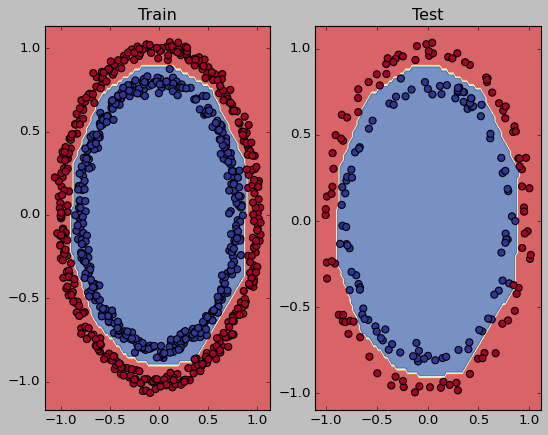

In [36]:

# plt.figure(figsize(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. how to improing a model (from model perspective)
* add more layers - give the model more chance to learn about patterns in the data
* add more hidden units - go from 5 hidden units to 10 hidden units
* fit for longer
* changing the activation functions
* change the learning rate
* change the loss function

These options are all from a model's perspective because they deal directlt with the model, rather than the data.

and because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as ***hyperparameters***